In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np


df_resumen = pd.read_excel("data/CR EJEMPLO MOD.xlsx", sheet_name="Data")
#df_detalle = pd.read_excel("pf excel.xlsx", sheet_name="Sheet2")
df_resumen.columns.values


c:\Users\ultim\anaconda3\envs\IDM\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


array(['CONTROL', '# CHEQUE', 'PARTIDA PRESUPUESTAL', 'UIDD/FOLIO FISCAL',
       'DIRECCION', 'REGIMEN FISCAL', 'NOMBRE REGIMEN FISCAL', 'RFC',
       'STATUS', 'FECHA DE RECIBIDO', 'SEMANA QUE SE PAGA', 'TIPO',
       'NOMBRE DEL PROVEEDOR', 'CORREO', 'CONCEPTO', 'TIPO2', 'SUBTOTAL',
       'IVA', 'OTROS IMPUESTOS', 'RET IVA', 'RET ISR', 'TOTAL',
       'CUENTA CLAVE', 'BANCO', 'ESTATUS', 'FECHA DE PAGO ', 'NOTAS',
       'Valida', 'MES', 'Column1', 'SUBTOTAL2', 'IVA3', 'RET IVA4',
       'RET ISR.1', 'TOTAL.1', 'CAMBIOS', 'Unnamed: 36'], dtype=object)

In [18]:
# Eliminar filas vacías o irrelevantes en df_resumen
df_resumen = df_resumen.dropna(subset=["TIPO", "Valida", "TIPO","TOTAL","FECHA DE PAGO "], how='all')


# Asegurar que los datos numéricos estén en el formato correcto
df_numeros = df_resumen[pd.to_numeric(df_resumen['FECHA DE PAGO '], errors='coerce').notna()]
df_numeros=df_numeros.loc[df_numeros["FECHA DE PAGO "] != -45168, :]

df_numeros = df_numeros.dropna(subset=['TOTAL'])
#display(df_detalle)
display(df_numeros)

,CONTROL,# CHEQUE,PARTIDA PRESUPUESTAL,UIDD/FOLIO FISCAL,DIRECCION,REGIMEN FISCAL,NOMBRE REGIMEN FISCAL,RFC,STATUS,FECHA DE RECIBIDO,...,Valida,MES,Column1,SUBTOTAL2,IVA3,RET IVA4,RET ISR.1,TOTAL.1,CAMBIOS,Unnamed: 36
0,NaN,NaN,Income (Funding),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Balance,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Income (Funding) IVA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Balance,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F1.2,NaN,Income (Funding),NaN,NaN,Estados Unidos (los),Estados Unidos (los),0.0,NaN,NaN,...,Balance,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N001,0001,7007-009,0.0,86127,Régimen Simplificado de Confianza,Régimen Simplificado de Confianza,1.0,NaN,33.0,...,7007-009,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-45135.0
4,N003,0004,1107-009,1.0,4318,Régimen Simplificado de Confianza,Régimen Simplificado de Confianza,2.0,NaN,40.0,...,1107-009,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-45128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6762,T13,-,Impuestos Pagados (IVA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Balance,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6763,T13.1,-,Impuestos Pagados (ISR),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Balance,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7337,NaN,NaN,DEV IVA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Balance,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7338,NaN,NaN,DEV IVA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Balance,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Resumen general
print(df_numeros.describe())


# Departamentos únicos
len(df_numeros["Valida"].unique())

       UIDD/FOLIO FISCAL          RFC  FECHA DE RECIBIDO  \
count        6233.000000  5742.000000         990.000000   
mean         2102.756618   280.222745         247.435837   
std          1306.970398   282.846292          72.615092   
min             0.000000     0.000000        -190.000000   
25%           782.000000    37.000000         204.498264   
50%          2054.000000   172.000000         260.782975   
75%          3249.000000   454.000000         282.861490   
max          4611.000000  1118.000000         467.694468   

       NOMBRE DEL PROVEEDOR       CORREO     CONCEPTO      SUBTOTAL  \
count           6370.000000  6040.000000  6373.000000  6.379000e+03   
mean             484.151648    37.346523  2051.357916  4.747569e+04   
std              404.276621    60.403467  1247.049945  7.308849e+05   
min                0.000000     0.000000     0.000000 -5.674003e+05   
25%              149.000000     1.000000   973.000000  5.163800e+02   
50%              343.000000    17

1034

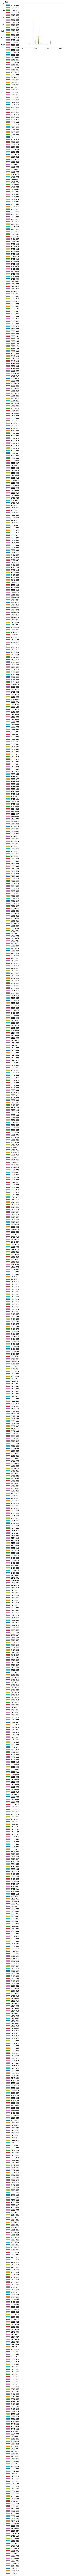

In [20]:
departamentos = list(df_numeros["Valida"].unique())
departamentos.remove("Balance")


for i in departamentos:
    coso = list(df_numeros.loc[df_numeros["Valida"] == i, 'TOTAL'])
    semanas = list(df_numeros.loc[df_numeros["Valida"] == i, "FECHA DE PAGO "])
    plt.bar(semanas,coso,label=i)
    #print(coso)
plt.legend()

plt.show()